# Plot data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Plot configuration
# Reference for color palettes: http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html

# Change the font
sns.set_context("paper")
sns.set_style("ticks")
matplotlib.rc('font', family='serif', serif='Fira Sans')

# Format time ticks
years = matplotlib.dates.YearLocator()   # every year
months = matplotlib.dates.MonthLocator()  # every month
yearsFmt = matplotlib.dates.DateFormatter('%Y')

## Load file and get general statistics for each

In [4]:
df01w = pd.read_csv("data/whois_fablabs.csv")
df02w = pd.read_csv("data/whois_hackerspaces.csv")
df03w = pd.read_csv("data/whois_makerspaces.csv")
df04w = pd.read_csv("data/whois_repaircafes.csv")

### Fab Labs

In [5]:
df01w.shape

(2133, 36)

In [6]:
df01w["URL_type"].value_counts()

URL_type
domain       1868
subdomain     265
Name: count, dtype: int64

In [7]:
df01w["URL_type"].value_counts(normalize=True) * 100

URL_type
domain       87.576184
subdomain    12.423816
Name: proportion, dtype: float64

In [8]:
df01w["domain_name"].value_counts(ascending=True).tail(10)

domain_name
t.me                      4
wixsite.com               5
pinterest.com             6
flickr.com               10
github.com               11
google.com               11
prefeitura.sp.gov.br     12
vk.com                   20
linkedin.com             24
None.                   509
Name: count, dtype: int64

### Hackerspaces

In [9]:
df02w.shape

(1956, 30)

In [10]:
df02w["URL_type"].value_counts()

URL_type
domain       1743
subdomain     213
Name: count, dtype: int64

In [11]:
df02w["URL_type"].value_counts(normalize=True) * 100

URL_type
domain       89.110429
subdomain    10.889571
Name: proportion, dtype: float64

In [12]:
df02w["domain_name"].value_counts(ascending=True).tail(10)

domain_name
twitter.com        4
wordpress.com      5
github.io          7
facebook.com       8
ccc.de             9
hacklab.fi         9
meetup.com        16
google.com        17
blogspot.com      17
None.            356
Name: count, dtype: int64

### Makerspaces

In [13]:
df03w.shape

(1025, 25)

In [14]:
df03w["URL_type"].value_counts()

URL_type
domain       919
subdomain    106
Name: count, dtype: int64

In [15]:
df03w["URL_type"].value_counts(normalize=True) * 100

URL_type
domain       89.658537
subdomain    10.341463
Name: proportion, dtype: float64

In [16]:
df03w["domain_name"].value_counts(ascending=True).tail(10)

domain_name
bainbridgebarn.org     3
ebrpl.com              3
blogspot.com           3
pascolibraries.org     3
myidiya.com            3
weebly.com             4
wordpress.com          6
meetup.com             7
google.com            16
facebook.com          42
Name: count, dtype: int64

### Repair Cafes

In [17]:
df04w.shape

(2633, 28)

In [18]:
df04w["URL_type"].value_counts()

URL_type
domain       2444
subdomain     189
Name: count, dtype: int64

In [19]:
df04w["URL_type"].value_counts(normalize=True) * 100

URL_type
domain       92.821876
subdomain     7.178124
Name: proportion, dtype: float64

In [20]:
df04w["domain_name"].value_counts(ascending=True).tail(10)

domain_name
centres-sociaux.fr         7
jimdo.com                  7
repaircafe-almere.nl      10
repairgrandnancy.fr       10
google.com                10
repaircafehv.org          14
repaircafe.org            23
wordpress.com             42
repairtogether.be        160
None.                   1099
Name: count, dtype: int64

## Transform into time series and get overall statistics

In [21]:
df01w["creation_date"] = pd.to_datetime(df01w["time"], format='mixed', utc=True)
df01w = df01w[df01w["creation_date"].notnull()]
df01w.set_index('creation_date', inplace=True)
df01w = df01w["lab_type"].resample('YE').count().to_frame("Fab Labs")

In [22]:
df02w["creation_date"] = pd.to_datetime(df02w["time"], format='mixed', utc=True)
df02w = df02w[df02w["creation_date"].notnull()]
df02w.set_index('creation_date', inplace=True)
df02w = df02w["lab_type"].resample('YE').count().to_frame("Hackerspaces")

In [23]:
df03w["creation_date"] = pd.to_datetime(df03w["time"], format='mixed', utc=True)
df03w = df03w[df03w["creation_date"].notnull()]
df03w.set_index('creation_date', inplace=True)
df03w = df03w["lab_type"].resample('YE').count().to_frame("Makerspaces")

In [24]:
df04w["creation_date"] = pd.to_datetime(df04w["time"], format='mixed', utc=True)
df04w = df04w[df04w["creation_date"].notnull()]
df04w.set_index('creation_date', inplace=True)
df04w = df04w["lab_type"].resample('YE').count().to_frame("Repair Cafes")

In [25]:
df01t = pd.read_csv("data/years_twitter_fablabs.csv")
df02t = pd.read_csv("data/years_twitter_hackerspaces.csv")
df03t = pd.read_csv("data/years_twitter_makerspaces.csv")
df04t = pd.read_csv("data/years_twitter_repaircafes.csv")
df05t = pd.read_csv("data/years_twitter_techshops.csv")

In [26]:
# manual download of GTrends
# https://trends.google.com/trends/explore?date=2004-01-01%202022-12-31&q=fablab%2B%22fab%20lab%22,makerspace,hackerspace,techshop,%22repair%20cafe%22&hl=en
dfg = pd.read_csv("data/gtrends_manual.csv", skiprows=1)
dfg = dfg.rename(columns={"Month": "creation_date"})
dfg = dfg.set_index("creation_date")
dfg.index = pd.to_datetime(dfg.index, utc=True)
dfg.replace(to_replace=['<1'], value=[0], inplace=True)
dfg = dfg.apply(pd.to_numeric)
dfg.columns = dfg.columns.str.replace(': (Worldwide)', '')
dfg_timeline = dfg
dfg_timeline = dfg_timeline.rename(columns={'fablab + "fab lab"': 'Fab Labs (GTrends)', 'makerspace': 'Makerspaces (GTrends)', 'hackerspace': 'Hackerspaces (GTrends)', 'techshop': 'Techshops (GTrends)', '"repair cafe"': 'Repair Cafes (GTrends)'})
dfg_timeline = dfg_timeline.resample('YE').sum()

In [27]:
df01t = df01t.assign(creation_date = pd.to_datetime(df01t.loc[:, 'creation_date'],format="%Y",errors ='coerce', utc=True))
df01t.set_index(pd.DatetimeIndex(df01t['creation_date']), inplace=True)
df01t.drop(columns=['creation_date'], inplace=True)
df01t = df01t.rename(columns={'Fab Labs': 'Fab Labs (Twitter)'})

df02t = df02t.assign(creation_date = pd.to_datetime(df02t.loc[:, 'creation_date'],format="%Y",errors ='coerce', utc=True))
df02t.set_index(pd.DatetimeIndex(df02t['creation_date']), inplace=True)
df02t.drop(columns=['creation_date'], inplace=True)
df02t = df02t.rename(columns={'Hackerspaces': 'Hackerspaces (Twitter)'})

df03t = df03t.assign(creation_date = pd.to_datetime(df03t.loc[:, 'creation_date'],format="%Y",errors ='coerce', utc=True))
df03t.set_index(pd.DatetimeIndex(df03t['creation_date']), inplace=True)
df03t.drop(columns=['creation_date'], inplace=True)
df03t = df03t.rename(columns={'Makerspaces': 'Makerspaces (Twitter)'})

df04t = df04t.assign(creation_date = pd.to_datetime(df04t.loc[:, 'creation_date'],format="%Y",errors ='coerce', utc=True))
df04t.set_index(pd.DatetimeIndex(df04t['creation_date']), inplace=True)
df04t.drop(columns=['creation_date'], inplace=True)
df04t = df04t.rename(columns={'Repair Cafes': 'Repair Cafes (Twitter)'})

df05t = df05t.assign(creation_date = pd.to_datetime(df05t.loc[:, 'creation_date'],format="%Y",errors ='coerce', utc=True))
df05t.set_index(pd.DatetimeIndex(df05t['creation_date']), inplace=True)
df05t.drop(columns=['creation_date'], inplace=True)
df05t = df05t.rename(columns={'Techshops': 'TechShops (Twitter)'})

In [28]:
df01w = df01w.rename(columns={'Fab Labs': 'Fab Labs (WHOIS)'})
df02w = df02w.rename(columns={'Hackerspaces': 'Hackerspaces (WHOIS)'})
df03w = df03w.rename(columns={'Makerspaces': 'Makerspaces (WHOIS)'})
df04w = df04w.rename(columns={'Repair Cafes': 'Repair Cafes (WHOIS)'})

In [29]:
df_all = df01t.join(df02t, how='outer').join(df03t, how='outer').join(df04t, how='outer').join(df05t, how='outer').join(df01w, how='outer').join(df02w, how='outer').join(df03w, how='outer').join(df04w, how='outer')

In [30]:
df_all.describe()

,Fab Labs (Twitter),Hackerspaces (Twitter),Makerspaces (Twitter),Repair Cafes (Twitter),TechShops (Twitter),Fab Labs (WHOIS),Hackerspaces (WHOIS),Makerspaces (WHOIS),Repair Cafes (WHOIS)
count,17.000000,17.000000,17.000000,16.000000,16.000000,35.000000,35.000000,41.000000,35.000000
mean,56.823529,26.588235,57.647059,19.125000,11.937500,31.942857,30.542857,20.682927,29.971429
std,41.458165,21.038830,39.384231,11.870833,5.272175,20.891798,27.005819,21.448122,37.275986
min,6.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,31.000000,11.000000,30.000000,8.750000,7.750000,19.000000,12.000000,5.000000,10.000000
50%,49.000000,17.000000,47.000000,19.000000,11.500000,28.000000,22.000000,12.000000,19.000000
75%,81.000000,46.000000,105.000000,27.250000,17.000000,39.500000,39.000000,32.000000,35.500000
max,148.000000,73.000000,118.000000,39.000000,20.000000,78.000000,97.000000,73.000000,204.000000


In [31]:
data_max = max(df_all.max())

In [32]:
df_all.max()

Fab Labs (Twitter)        148.0
Hackerspaces (Twitter)     73.0
Makerspaces (Twitter)     118.0
Repair Cafes (Twitter)     39.0
TechShops (Twitter)        20.0
Fab Labs (WHOIS)           78.0
Hackerspaces (WHOIS)       97.0
Makerspaces (WHOIS)        73.0
Repair Cafes (WHOIS)      204.0
dtype: float64

In [33]:
peak_values = df_all.max()
peak_info = pd.DataFrame({
    'peak_time': df_all.idxmax(),
    'peak_value': df_all.max()
})
print(peak_info)

                                       peak_time  peak_value
Fab Labs (Twitter)     2015-01-01 00:00:00+00:00       148.0
Hackerspaces (Twitter) 2010-01-01 00:00:00+00:00        73.0
Makerspaces (Twitter)  2016-01-01 00:00:00+00:00       118.0
Repair Cafes (Twitter) 2014-01-01 00:00:00+00:00        39.0
TechShops (Twitter)    2015-01-01 00:00:00+00:00        20.0
Fab Labs (WHOIS)       2014-12-31 00:00:00+00:00        78.0
Hackerspaces (WHOIS)   2013-12-31 00:00:00+00:00        97.0
Makerspaces (WHOIS)    2014-12-31 00:00:00+00:00        73.0
Repair Cafes (WHOIS)   2013-12-31 00:00:00+00:00       204.0


## Plot charts

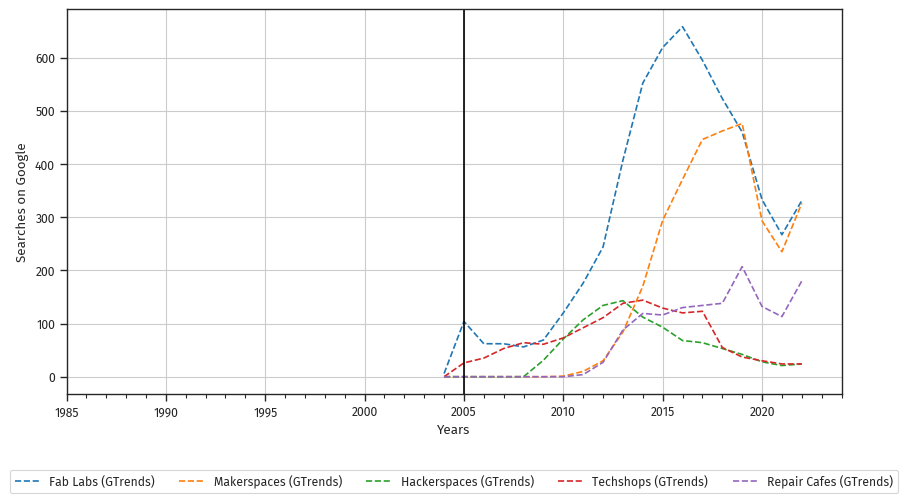

In [34]:
ax = dfg_timeline.plot(figsize=(10,5), color=sns.color_palette("tab10"), linestyle='dashed')
ax.legend()
#ax.set_ylim(0,data_max+10)
ax.set_xlim([datetime.date(1985, 1, 1), datetime.date(2024, 1, 1)])
plt.axvline(datetime.date(2005, 1, 1), color='black')
plt.xlabel('Years')
plt.ylabel('Searches on Google')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=5)
plt.savefig("pdf/gtrends_labs_timeline.pdf", bbox_inches="tight")
plt.savefig("png/gtrends_labs_timeline.png", dpi=300, bbox_inches="tight")

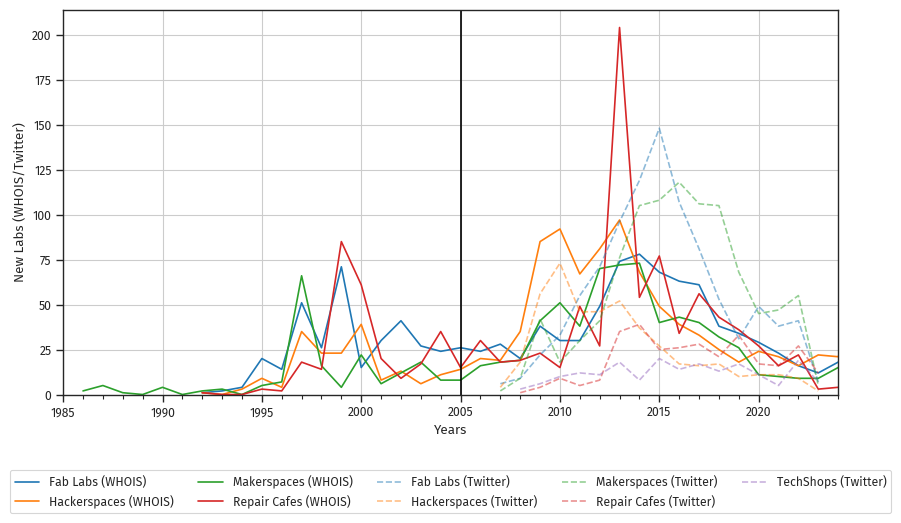

In [35]:
lstyle = 'solid'
ax = df01w.plot(figsize=(10,5), color=sns.color_palette("tab10")[0], linestyle=lstyle)
df02w.plot(ax=ax, color=sns.color_palette("tab10")[1], linestyle=lstyle)
df03w.plot(ax=ax, color=sns.color_palette("tab10")[2], linestyle=lstyle)
df04w.plot(ax=ax, color=sns.color_palette("tab10")[3], linestyle=lstyle)
lstyle = 'dashed'
df01t.plot(ax=ax, color=sns.color_palette("tab10")[0], linestyle=lstyle, alpha=0.5)
df02t.plot(ax=ax, color=sns.color_palette("tab10")[1], linestyle=lstyle, alpha=0.5)
df03t.plot(ax=ax, color=sns.color_palette("tab10")[2], linestyle=lstyle, alpha=0.5)
df04t.plot(ax=ax, color=sns.color_palette("tab10")[3], linestyle=lstyle, alpha=0.5)
df05t.plot(ax=ax, color=sns.color_palette("tab10")[4], linestyle=lstyle, alpha=0.5)
ax.legend()
ax.set_ylim(0,data_max+10)
ax.set_xlim([datetime.date(1985, 1, 1), datetime.date(2024, 1, 1)])
plt.axvline(datetime.date(2005, 1, 1), color='black')
plt.xlabel('Years')
plt.ylabel('New Labs (WHOIS/Twitter)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=5)
plt.savefig("pdf/twitter_whois_labs_timeline.pdf", bbox_inches="tight")
plt.savefig("png/twitter_whois_labs_timeline.png", dpi=300, bbox_inches="tight")

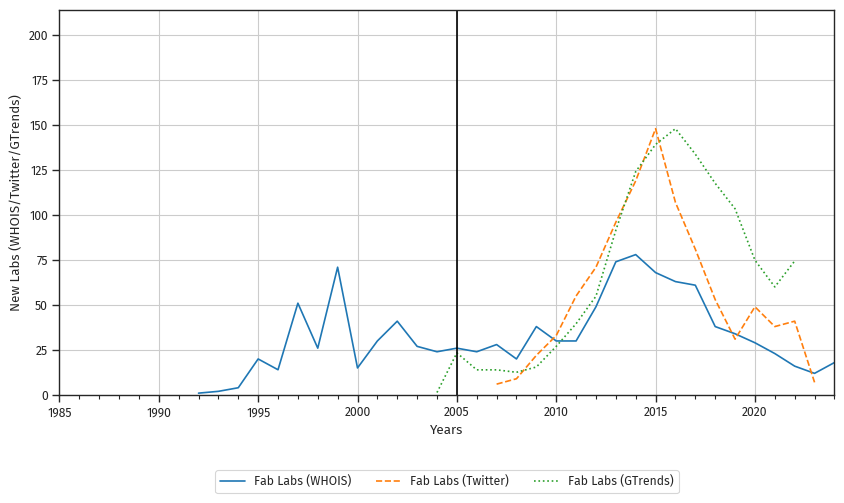

In [36]:
ax = df01w.plot(figsize=(10,5), linestyle='solid')
df01t.plot(ax=ax, linestyle='dashed')
nval = dfg_timeline['Fab Labs (GTrends)'].max() / max(df_all['Fab Labs (Twitter)'].max(), df_all['Fab Labs (WHOIS)'].max())
dfg_timeline['Fab Labs (GTrends)'].divide(nval).plot(ax=ax, linestyle='dotted', color=sns.color_palette()[2])
ax.legend()
ax.set_ylim(0,data_max+10)
ax.set_xlim([datetime.date(1985, 1, 1), datetime.date(2024, 1, 1)])
plt.axvline(datetime.date(2005, 1, 1), color='black')
plt.xlabel('Years')
plt.ylabel('New Labs (WHOIS/Twitter/GTrends)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.savefig("pdf/twitter_whois_gtrends_labs_timeline_fablabs.pdf", bbox_inches="tight")
plt.savefig("png/twitter_whois_gtrends_labs_timeline_fablabs.png", dpi=300, bbox_inches="tight")

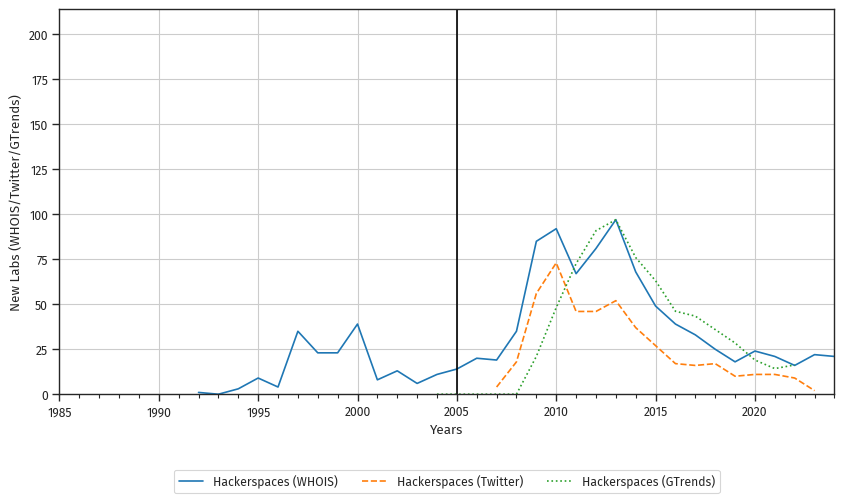

In [37]:
ax = df02w.plot(figsize=(10,5), linestyle='solid')
df02t.plot(ax=ax, linestyle='dashed')
nval = dfg_timeline['Hackerspaces (GTrends)'].max() / max(df_all['Hackerspaces (Twitter)'].max(), df_all['Hackerspaces (WHOIS)'].max())
dfg_timeline['Hackerspaces (GTrends)'].divide(nval).plot(ax=ax, linestyle='dotted', color=sns.color_palette()[2])
ax.legend()
ax.set_ylim(0,data_max+10)
ax.set_xlim([datetime.date(1985, 1, 1), datetime.date(2024, 1, 1)])
plt.axvline(datetime.date(2005, 1, 1), color='black')
plt.xlabel('Years')
plt.ylabel('New Labs (WHOIS/Twitter/GTrends)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.savefig("pdf/twitter_whois_gtrends_labs_timeline_hackerspaces.pdf", bbox_inches="tight")
plt.savefig("png/twitter_whois_gtrends_labs_timeline_hackerspaces.png", dpi=300, bbox_inches="tight")

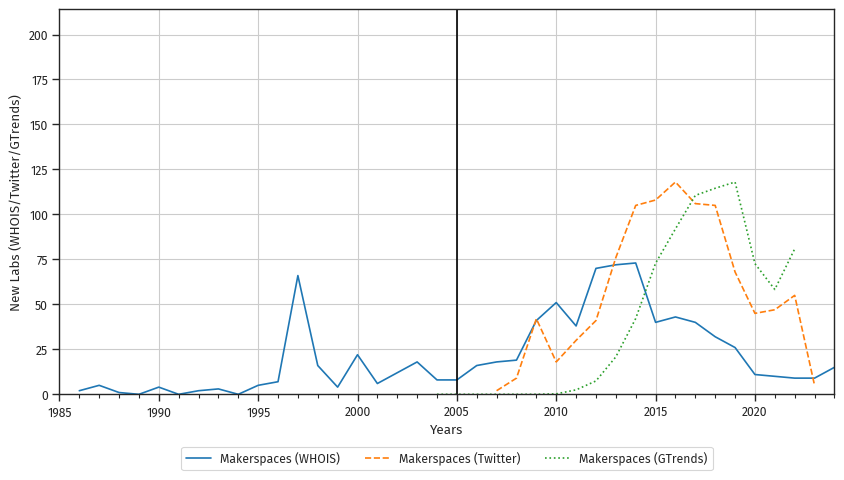

In [38]:
ax = df03w.plot(figsize=(10,5), linestyle='solid')
df03t.plot(ax=ax, linestyle='dashed')
nval = dfg_timeline['Makerspaces (GTrends)'].max() / max(df_all['Makerspaces (Twitter)'].max(), df_all['Makerspaces (WHOIS)'].max())
dfg_timeline['Makerspaces (GTrends)'].divide(nval).plot(ax=ax, linestyle='dotted', color=sns.color_palette()[2])
ax.legend()
ax.set_ylim(0,data_max+10)
ax.set_xlim([datetime.date(1985, 1, 1), datetime.date(2024, 1, 1)])
plt.axvline(datetime.date(2005, 1, 1), color='black')
plt.xlabel('Years')
plt.ylabel('New Labs (WHOIS/Twitter/GTrends)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
plt.savefig("pdf/twitter_whois_gtrends_labs_timeline_makerspaces.pdf", bbox_inches="tight")
plt.savefig("png/twitter_whois_gtrends_labs_timeline_makerspaces.png", dpi=300, bbox_inches="tight")

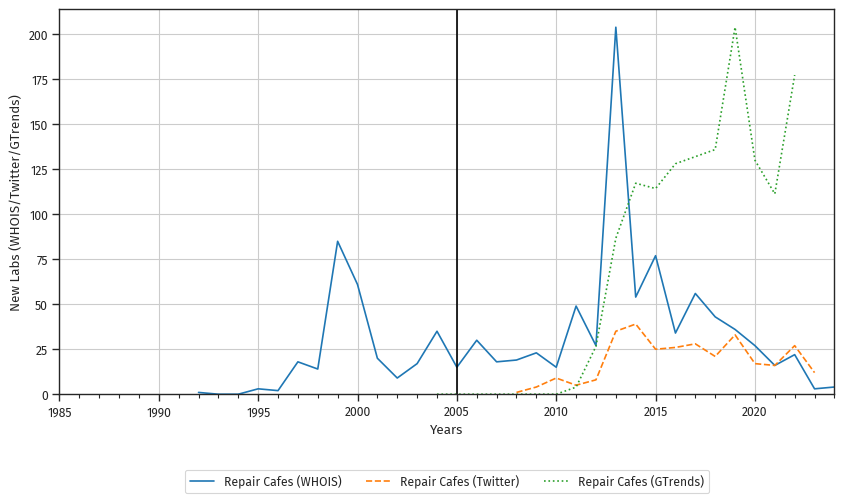

In [39]:
ax = df04w.plot(figsize=(10,5), linestyle='solid')
df04t.plot(ax=ax, linestyle='dashed')
nval = dfg_timeline['Repair Cafes (GTrends)'].max() / max(df_all['Repair Cafes (Twitter)'].max(), df_all['Repair Cafes (WHOIS)'].max())
dfg_timeline['Repair Cafes (GTrends)'].divide(nval).plot(ax=ax, linestyle='dotted', color=sns.color_palette()[2])
ax.legend()
ax.set_ylim(0,data_max+10)
ax.set_xlim([datetime.date(1985, 1, 1), datetime.date(2024, 1, 1)])
plt.axvline(datetime.date(2005, 1, 1), color='black')
plt.xlabel('Years')
plt.ylabel('New Labs (WHOIS/Twitter/GTrends)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.savefig("pdf/twitter_whois_gtrends_labs_timeline_repaircafes.pdf", bbox_inches="tight")
plt.savefig("png/twitter_whois_gtrends_labs_timeline_repaircafes.png", dpi=300, bbox_inches="tight")

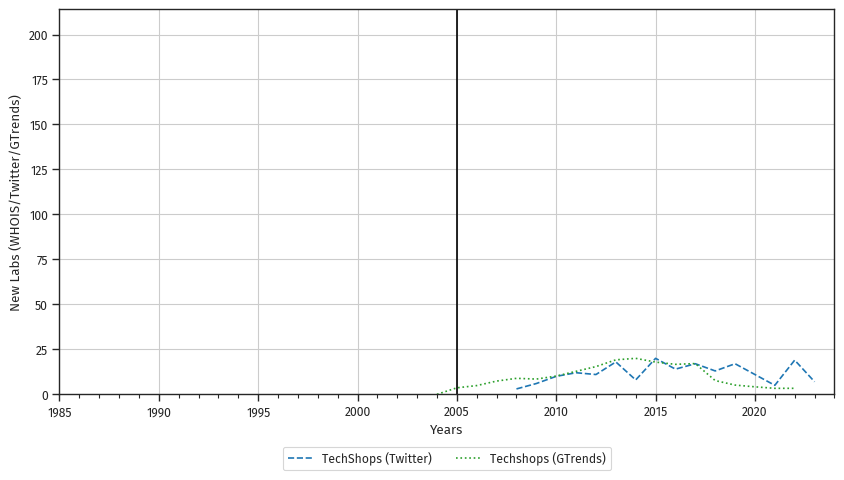

In [40]:
ax = df05t.plot(figsize=(10,5), linestyle='dashed')
nval = dfg_timeline['Techshops (GTrends)'].max() / df_all['TechShops (Twitter)'].max()
dfg_timeline['Techshops (GTrends)'].divide(nval).plot(ax=ax, linestyle='dotted', color=sns.color_palette()[2])
ax.legend()
ax.set_ylim(0,data_max+10)
ax.set_xlim([datetime.date(1985, 1, 1), datetime.date(2024, 1, 1)])
plt.axvline(datetime.date(2005, 1, 1), color='black')
plt.xlabel('Years')
plt.ylabel('New Labs (WHOIS/Twitter/GTrends)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
plt.savefig("pdf/twitter_whois_gtrends_labs_timeline_techshops.pdf", bbox_inches="tight")
plt.savefig("png/twitter_whois_gtrends_labs_timeline_techshops.png", dpi=300, bbox_inches="tight")